In [2]:
import pandas as pd 
from sklearn import preprocessing
import numpy as np
import cv2
import skimage.io
import matplotlib.pyplot as plt
import PIL.Image
import time
import os
from skimage.transform import rescale, resize, downscale_local_mean

In [3]:
#data_car = pd.read_csv("interpolated.csv", na_values = ['no info', '.'])
data_car = pd.read_csv("driving_log.csv", na_values = ['no info', '.'])

In [4]:
# Data presentation
data_car.head()

,dir_center,dir_left,dir_right,angle,torque,acc,speed
0,IMG/center_2018_11_20_17_12_32_757.jpg,IMG/left_2018_11_20_17_12_32_757.jpg,IMG/right_2018_11_20_17_12_32_757.jpg,0.00,0.000000,0,7.719079
1,IMG/center_2018_11_20_17_12_32_854.jpg,IMG/left_2018_11_20_17_12_32_854.jpg,IMG/right_2018_11_20_17_12_32_854.jpg,-0.05,0.000000,0,7.653603
2,IMG/center_2018_11_20_17_12_32_945.jpg,IMG/left_2018_11_20_17_12_32_945.jpg,IMG/right_2018_11_20_17_12_32_945.jpg,-0.30,0.090405,0,7.566245
3,IMG/center_2018_11_20_17_12_33_011.jpg,IMG/left_2018_11_20_17_12_33_011.jpg,IMG/right_2018_11_20_17_12_33_011.jpg,-0.45,0.291078,0,7.640279
4,IMG/center_2018_11_20_17_12_33_079.jpg,IMG/left_2018_11_20_17_12_33_079.jpg,IMG/right_2018_11_20_17_12_33_079.jpg,-0.65,0.493290,0,7.938390


In [5]:
# Verificando homegeneidad de los datos de salida
angle_dt = data_car['angle']
print(angle_dt.dtypes)
angle_dt.head()

float64


0    0.00
1   -0.05
2   -0.30
3   -0.45
4   -0.65
Name: angle, dtype: float64

In [6]:
# Normalizando valores de angularidad, normalizando en base al valor positivo mayor
#Y_train = (angle_dt-angle_dt.min())/(angle_dt.max()-angle_dt.min())
Y_train = angle_dt#/abs(angle_dt.min())
print(Y_train.max())
print(Y_train.min())
Y_train.head(5)


1.0
-1.0


0    0.00
1   -0.05
2   -0.30
3   -0.45
4   -0.65
Name: angle, dtype: float64

In [6]:
def path2array(X_train_path,mini,maxi):
    X_train = list()
    #X_0 = skimage.io.imread(X_train_path[0][0])
    #X_1 = skimage.io.imread(X_train_path[0][1])
    #X_train = np.append([X_0],[X_1],axis=0) #225
    for img_path in X_train_path[0][mini:maxi]:
        #print(img_path)
        temp = skimage.io.imread(img_path)[60:-25,:,:]
        temp = cv2.resize(temp,(int(200), int(66)))
        temp = cv2.cvtColor(temp, cv2.COLOR_RGB2YUV)
        X_train.append(temp)
        #X_train = np.append(X_train,[skimage.io.imread(img_path)],axis=0)
    X_train = np.array(X_train)
    #X_train.shape
    return X_train
    

In [7]:
#Take data with just belong to the center camera >> Imagenes
#bool_id = np.array(data_car['frame_id']=='center_camera')
#img_center_index = list(np.where(bool_id == True)[0])

#X_train_path = data_car['filename'].iloc[img_center_index]
#X_train_path = np.array(X_train_path)
#X_train_path = pd.DataFrame(X_train_path)
#X_train_path[0].head()

X_train_path = data_car['dir_center']
X_train_path = np.array(X_train_path)
X_train_path = pd.DataFrame(X_train_path)
X_train_path[0].head()

0    IMG/center_2018_11_20_17_12_32_757.jpg
1    IMG/center_2018_11_20_17_12_32_854.jpg
2    IMG/center_2018_11_20_17_12_32_945.jpg
3    IMG/center_2018_11_20_17_12_33_011.jpg
4    IMG/center_2018_11_20_17_12_33_079.jpg
Name: 0, dtype: object

1.90415418148


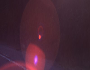

In [0]:

temp = skimage.io.imread(data_car['filename'][27210])[224:,:,:]
temp = cv2.resize(temp,(int(200), int(66)))
print(angle_dt[27211])
PIL.Image.fromarray(temp)

## X_test

(2000, 66, 200, 3)


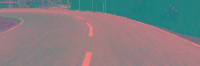

In [8]:
# Convirtiendo las imagenes 2 arrays
minimo = 15000
maximo = 17000
#X_train = skimage.io.imread(X_train_path[0][0]) 
X_train = path2array(X_train_path,minimo,maximo)
print(X_train.shape)
#im_test = skimage.io.imread(X_train_path[0][0])
#im_test = cv2.imread(X_train_path[0][500], cv2.COLOR_BGR2RGB)
PIL.Image.fromarray(X_train[1500])

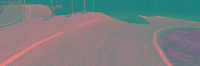

In [12]:
PIL.Image.fromarray(X_train[1950])

In [0]:
# Save file
filename = os.path.join("data/", "{}.npy".format("X_test2"))
np.save(filename,X_train)

## Y_test

In [0]:
#Take data with just belong to the center camera >> Angulos
#Y_train = Y_train.iloc[img_center_index]
Y_train = angle_dt
Y_train = np.array(Y_train)
# Save file
filename = os.path.join("data/", "{}.npy".format("Y_test2"))
np.save(filename,Y_train[minimo:maximo])

In [0]:
!nvidia-smi

Wed Nov 21 01:34:31 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0   124W / 149W |   9435MiB / 11441MiB |    100%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!mkdir data

In [0]:
from keras.models import load_model
model1 = load_model('backup/check_model.h5')

Using TensorFlow backend.


(70, 90, 3)
Resultados Ypred = 0.05256880074739456


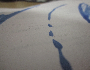

In [0]:
temp = skimage.io.imread('IMG_9238.JPG')
temp = cv2.resize(temp[60:,:,:],(int(90), int(70)))
#temp = X_train[900]
#temp = cv2.flip( temp, 1 )
print(temp.shape)
x_p = model1.predict(np.expand_dims(temp[:,:,0:3],axis=0))
print('Resultados Ypred = {}'.format(x_p[0][0]))
PIL.Image.fromarray(temp[:,:,0:3])

In [11]:
#Y_train = Y_train.iloc[img_center_index]
#minimo = 30000
#maximo = 33000
#Y_test = np.array(Y_train[minimo:maximo])
!nvidia-smi

Wed Nov 21 17:11:09 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    36W / 300W |      0MiB / 16160MiB |      1%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  